# Gözetimli Öğrenme Algoritmaları

## KNN
#### KNN de önemli olan hiperparametre (Komşu sayılarını= k) seçiminin iyi yapılması gerekir
-  Bu algoritmanın temel prensibi, yeni bir veri noktasının sınıfını belirlerken, o noktaya en yakın 𝐾
- K komşusuna bakarak karar vermektir.

Dogruluk: 0.9590643274853801
confusion_matrix:
[[ 59   4]
 [  3 105]]


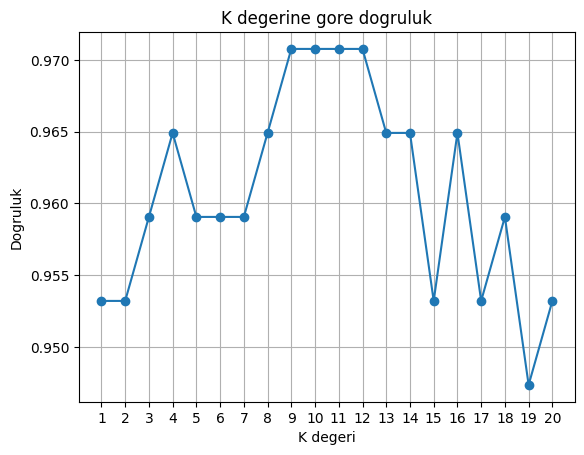

In [1]:
# sklearn: ML Library
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# (1) Veri Seti İncelenmesi
cancer = load_breast_cancer()
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df["target"] = cancer.target

# (2) Makine Öğrenmesi Modelinin Seçilmesi – KNN Sınıflandırıcı
# (3) Modelin Train Edilmesi
X = cancer.data # features
y = cancer.target # target

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# olceklendirme 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# knn modeli olustur ve train et
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train) # fit fonksiyonu verimizi (samples + target) kullanarak knn algoritmasini egitir

# (4) Sonuçların Değerlendirilmesi: test
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Dogruluk:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("confusion_matrix:")
print(conf_matrix)


# (5) Hiperparametre Ayarlaması
"""
    KNN: Hyperparameter = K
        K: 1,2,3 ... N
        Accuracy: %A, %B, %C ....
"""
accuracy_values = []
k_values = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    k_values.append(k)

plt.figure()
plt.plot(k_values, accuracy_values, marker = "o", linestyle = "-")
plt.title("K degerine gore dogruluk")
plt.xlabel("K degeri")
plt.ylabel("Dogruluk")
plt.xticks(k_values)
plt.grid(True)

## Decision Tree 
#### Bu algoritmada önemli feature ler nelerdir ve nasıl bulunur ondan bahsediliyor
- max depth : bu makinen overfit olmaısnı engellemek içindir
- gini  değeri, dallanma işlemi sırasında Gini İndeksini kullanarak veri setini bölmek için kullanılır. Gini İndeksi, saf olmayan veri kümelerinin ölçülmesinde kullanılır ve sıfıra yaklaştıkça saflaşır

iris veri seti ile egitilen DT modeli dogrulugu:  1.0
conf_matrix: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


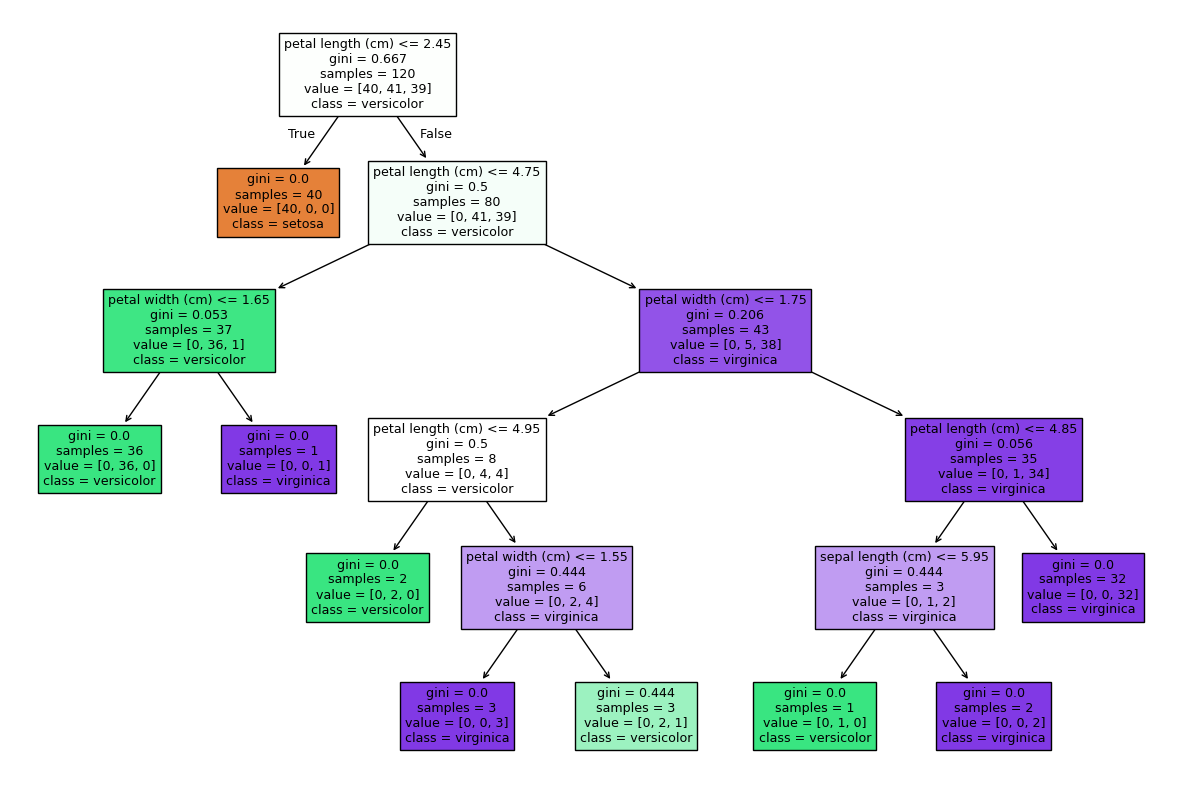

petal length (cm): 0.9045522597319637
petal width (cm): 0.07849499604256478
sepal length (cm): 0.016952744225471498
sepal width (cm): 0.0


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

# veri seti inceleme
iris = load_iris()

X = iris.data # features
y = iris.target # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# DT modeli olustur ve train et
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5, random_state = 42) # criterion="entropy"
tree_clf.fit(X_train, y_train)

# DT evaluation test
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("iris veri seti ile egitilen DT modeli dogrulugu: ", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("conf_matrix: ")
print(conf_matrix)

plt.figure(figsize = (15,10))
plot_tree(tree_clf, filled = True, feature_names = iris.feature_names, class_names = list(iris.target_names))
plt.show()

feature_importances = tree_clf.feature_importances_
feature_names = iris.feature_names
feature_importances_sorted = sorted(zip(feature_importances, feature_names), reverse = True)
for importance, feature_name in feature_importances_sorted:
    print(f"{feature_name}: {importance}")


import warnings
warnings.filterwarnings("ignore")


## Random Forest
#### Bu algoritmanın temel fikri, birden fazla karar ağacını eğiterek sonuçları birleştirmektir; bu sayede daha doğru ve genellenebilir bir model elde edilir. 
- burada n-estimator kaç tane ağaç olacagını belirleriz genelde 100 yaparız

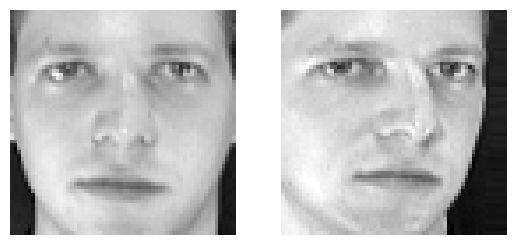

Acc:  0.9375


In [4]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

oli = fetch_olivetti_faces()

"""
    2D (64X64) -> 1D (4096)
"""

plt.figure()
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(oli.images[i], cmap = "gray")
    plt.axis("off")
plt.show()

X = oli.data 
y = oli.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Acc: ", accuracy)

## Logistic Regression
#### Lojistik regresyon, bir olayın gerçekleşme olasılığını tahmin etmek için kullanılan güçlü bir istatistiksel modeldir.

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

heart_disease = fetch_ucirepo(name = "heart_disease")

df = pd.DataFrame(data = heart_disease.data.features)

df["target"] = heart_disease.data.targets

# drop missing value
if df.isna().any().any():
    df.dropna(inplace = True)
    print("nan")
    
X = df.drop(["target"], axis = 1).values
y = df.target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

log_reg = LogisticRegression(penalty="l2", C=1, solver="lbfgs", max_iter=100)
log_reg.fit(X_train, y_train)

accuracy = log_reg.score(X_test, y_test)
print("Logistic Regression Acc:", accuracy)

## SVM
####  Veri noktalarını farklı sınıflara ayırmak için en iyi hiper düzlem (veya hiper yüzey) bulma ilkesine dayanır.
- Yüksek Boyutlu Verilerle İyi Çalışır: SVM, yüksek boyutlu verilerle iyi başa çıkar ve "küçük veri" problemlerinde bile etkili sonuçlar verir
-  Verilerin doğrusal olarak ayrıştırılabildiği durumlarda genellikle iyi sonuç verir.   linear seçeriz kerneli

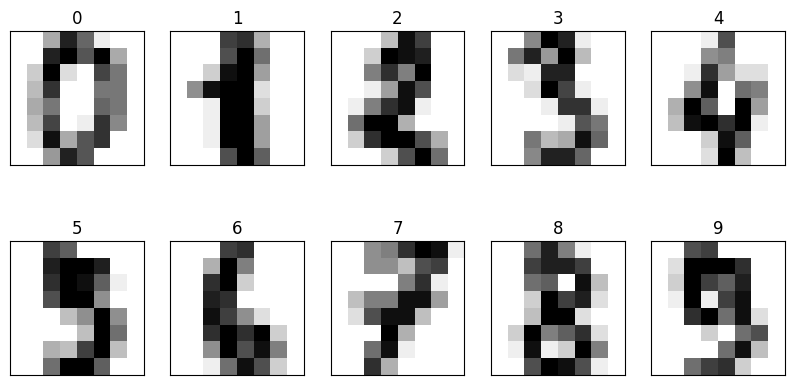

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [9]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

digits = load_digits()

fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (10,5),
                         subplot_kw = {"xticks":[], "yticks":[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = "binary", interpolation = "nearest")
    ax.set_title(digits.target[i])
    
plt.show()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_clf = SVC(kernel = "linear", random_state = 42)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print(classification_report(y_test, y_pred))


## Naive Bayes
#### Naive Bayes, basit yapısı ve etkililiği sayesinde birçok alanda kullanılan popüler bir sınıflandırma algoritmasıdır.
- Özellikle metin sınıflandırması gibi büyük veri kümelerinde başarılı sonuçlar verir. 

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

y_pred = nb_clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Algoritmaların Karşılaştırılması

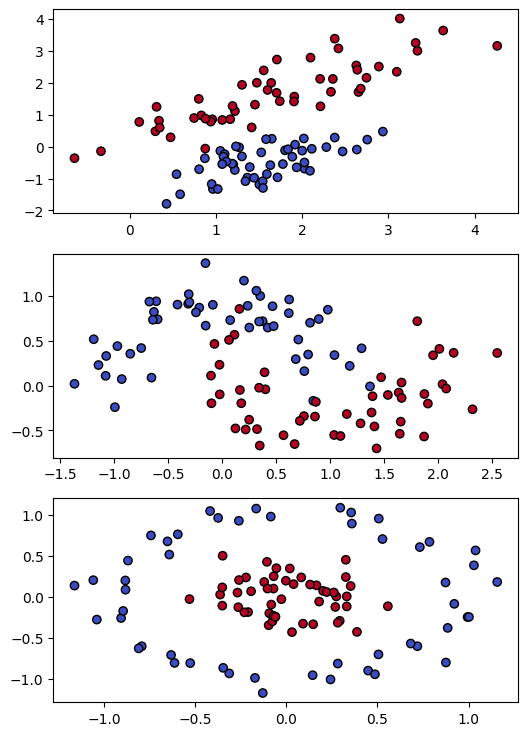

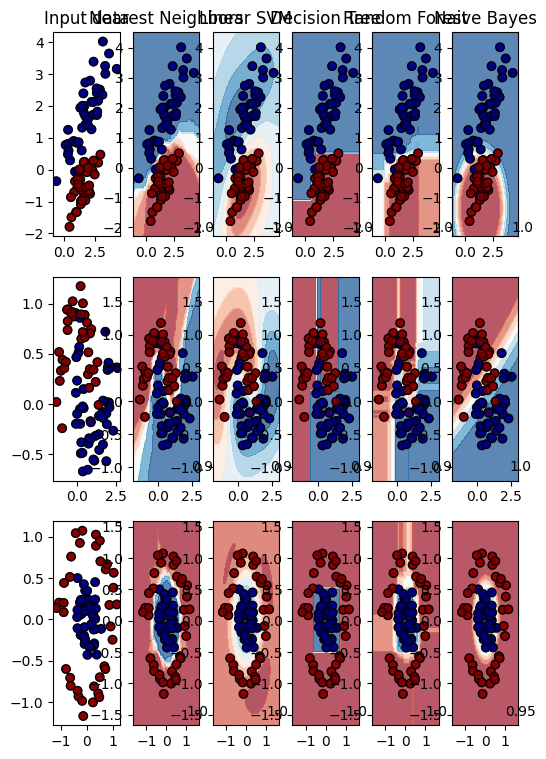

In [11]:
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.inspection import DecisionBoundaryDisplay

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class = 1, random_state = 42)
X += 1.2 * np.random.uniform(size = X.shape)
Xy = (X, y)
# plt.scatter(X[:, 0], X[:, 1], c = y)

# X, y = make_moons(noise = 0.2, random_state=42)
# plt.scatter(X[:, 0], X[:, 1], c = y)

# X, y = make_circles(noise = 0.1, factor = 0.3, random_state=42)
# plt.scatter(X[:, 0], X[:, 1], c = y)

datasets = [Xy,
            make_moons(noise = 0.2, random_state=42),
            make_circles(noise = 0.1, factor = 0.3, random_state=42)]

fig = plt.figure(figsize = (6,9))
i = 1
for ds_cnt, ds in enumerate(datasets):
    X, y = ds

    ax = plt.subplot(len(datasets), 1, i)
    ax.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.coolwarm, edgecolors = "black")
    i += 1
    
plt.show()    
    
names = ["Nearest Neighbors", "Linear SVM", "Decision Tree", "Random Forest", "Naive Bayes"]

classifiers = [KNeighborsClassifier(), 
               SVC(), 
               DecisionTreeClassifier(), 
               RandomForestClassifier(), 
               GaussianNB()]
    
fig = plt.figure(figsize = (6,9))    
i = 1
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    cm_bright = ListedColormap(["darkred", "darkblue"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
        
    # plot training data
    ax.scatter(X_train[:,0], X_train[:,1], c = y_train, cmap = cm_bright, edgecolors = "black")
    
    # plot test data
    ax.scatter(X_train[:,0], X_train[:,1], c = y_train, cmap = cm_bright, edgecolors = "black", alpha = 0.6)
    
    i += 1
    
    for name, clf in zip(names, classifiers):
        
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test) # accuracy
        DecisionBoundaryDisplay.from_estimator(clf, X, cmap = plt.cm.RdBu, alpha = 0.7, ax = ax, eps = 0.5)
        
        # plot training data
        ax.scatter(X_train[:,0], X_train[:,1], c = y_train, cmap = cm_bright, edgecolors = "black")
        
        # plot test data
        ax.scatter(X_train[:,0], X_train[:,1], c = y_train, cmap = cm_bright, edgecolors = "black", alpha = 0.6)
        
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            X[:, 0].max() - 0.15,
            X[:, 1].min() - 0.35,
            str(score))
        
        i += 1

## Linear Regression
#### Doğrusal regresyon, iki veya daha fazla değişken arasındaki ilişkiyi modellemek için kullanılan istatistiksel bir yöntemdir. 
- Özellikle, bir bağımlı değişkeni (sonucu tahmin etmek istediğimiz değişken) bir veya daha fazla bağımsız değişken (sonucu etkileyen değişkenler) ile doğrusal bir ilişki içinde modellemek için kullanılır.

a1:  3.9815176055066326
a0:  3.457855339446237


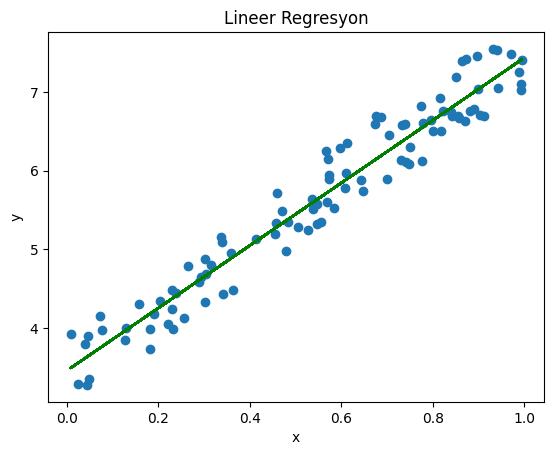

In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# veri olustur
X = np.random.rand(100,1)
y = 3 + 4 * X + np.random.rand(100,1) # y = 3 + 4x 

# plt.scatter(X,y)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

plt.figure()
plt.scatter(X,y)
plt.plot(X, lin_reg.predict(X), color = "red", alpha = 0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Lineer Regresyon")

# y = 3 + 4x  -> y = a0 + a1x
a1 = lin_reg.coef_[0][0] 
print("a1: ",a1)

a0 = lin_reg.intercept_[0]
print("a0: ",a0)

for i in range(100):
    y_ = a0 + a1 * X
    plt.plot(X, y_, color = "green", alpha = 0.7)

## Çok Değişkenli Doğrusal Regresyon
#### . Ancak, çoklu regresyon, birden fazla bağımsız değişkenin birden fazla yönüyle bağımlı değişkeni nasıl etkilediğini analiz etmemizi sağlar.
-  Gerçek dünyadaki çoğu olay, tek bir faktörden ziyade birden fazla faktörün etkisi altındadır. Çoklu regresyon, bu karmaşık ilişkileri modellememize olanak tanır.

Katsayilar:  [3.06688984 4.96167991]
Kesisim:  0.4897128489384368


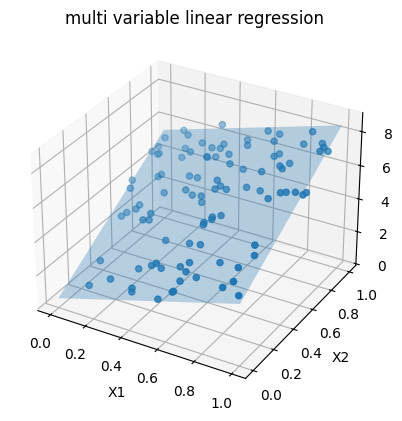

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# y = a0 + a1x -> linear regression
# y = a0 + a1x1 + a2x2 + ... + anxn -> multi variable linear regression
# y = a0 + a1x1 + a2x2 

X = np.random.rand(100, 2)
coef = np.array([3, 5])
# y = 0 + np.dot(X, coef)
y = np.random.rand(100) + np.dot(X, coef)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection = "3d")
# ax.scatter(X[:, 0], X[:, 1], y)
# ax.set_xlabel("X1")
# ax.set_ylabel("X2")
# ax.set_zlabel("y")

lin_reg = LinearRegression()
lin_reg.fit(X, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X[:, 0], X[:, 1], y)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")

x1, x2 = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
y_pred = lin_reg.predict(np.array([x1.flatten(), x2.flatten()]).T)
ax.plot_surface(x1, x2, y_pred.reshape(x1.shape), alpha= 0.3)
plt.title("multi variable linear regression")

print("Katsayilar: ", lin_reg.coef_)
print("Kesisim: ", lin_reg.intercept_)

## Polinom Regression
#### Basitçe söylemek gerekirse, doğrusal regresyonun daha esnek bir versiyonudur.
- Verilerinizdeki eğriliğin derecesine göre, polinomun derecesini ayarlayarak modelinizi daha esnek hale getirebilirsiniz.

Text(0.5, 1.0, 'Polinom Refresyon Modeli')

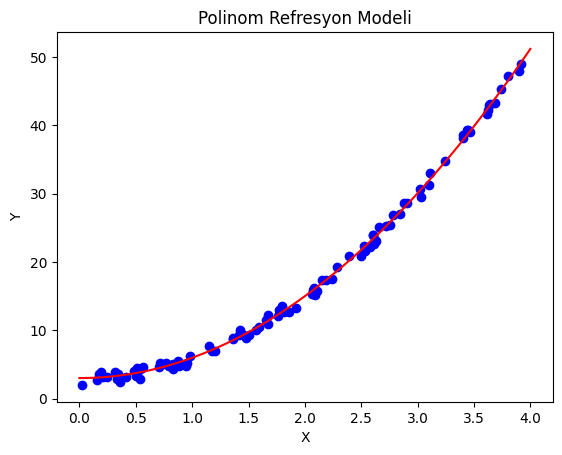

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = 4 * np.random.rand(100, 1)
y = 2 + 3*X**2 + 2 * np.random.rand(100, 1) # y = 2 + 3x^2

# plt.scatter(X, y)

"""
 1. derecen denklem => y = a0 + a1x => lineer regresyon
"""
poly_feat = PolynomialFeatures(degree=2)
X_poly = poly_feat.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

plt.scatter(X, y, color = "blue")

X_test = np.linspace(0, 4, 100).reshape(-1, 1)
X_test_poly = poly_feat.transform(X_test)
y_pred = poly_reg.predict(X_test_poly)

plt.plot(X_test, y_pred, color = "red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polinom Refresyon Modeli")



# Gözetimsiz Öğrenme Algoritmaları
## KMeans Algoritması
#### verileri benzer özelliklere sahip gruplara (kümelere) ayırmak için kullanılan popüler bir kümeleme algoritmasıdır.
- Her bir veri noktası, kendisine en yakın olan küme merkezine atanır. Bu, veri noktaları ile küme merkezleri arasındaki uzaklıkları hesaplayarak yapılır ve kaç küme oluşacağı belirtilir
  

Text(0.5, 1.0, 'K-Means')

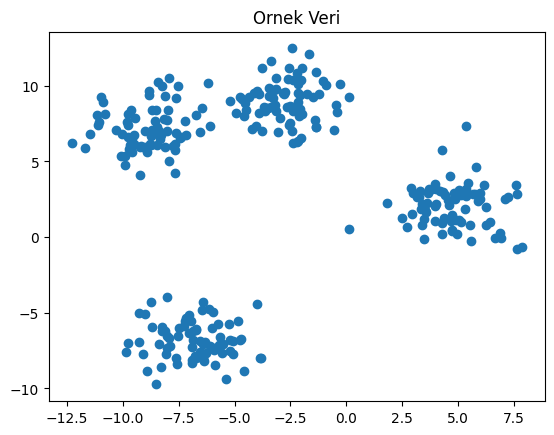

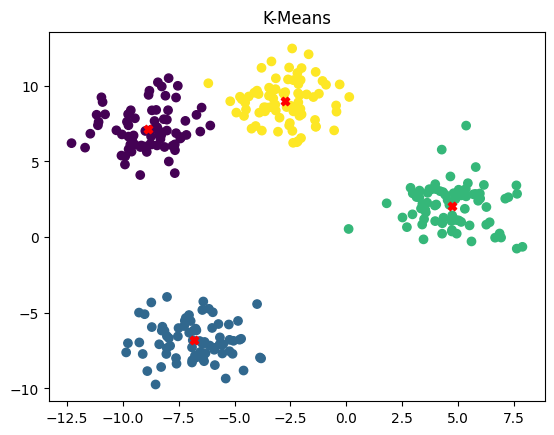

In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.4, random_state=42)
# sapmles=örnek sayısı,centers:küme sayısı,cluster_Std  verilerin standert sapması

plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.title("Ornek Veri")

kmeans = KMeans(n_clusters=4)# 4 tane küme bul
kmeans.fit(X)

labels = kmeans.labels_ # küme etiketleme

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c = labels, cmap = "viridis")

centers = kmeans.cluster_centers_ # kümenlerin merkezi
plt.scatter(centers[:, 0], centers[:, 1], c = "red", marker = "X")
plt.title("K-Means")

##  Hiyerarşik kümeleme algoritması#### K-Means gibi tek bir kümelenme çözümü üretmek yerine, verilerin farklı seviyelerde kümelenmesini gösteren bir ağaç yapısı (dendrogram) oluşturur.
- Bu yaklaşımda başlangıçta her veri noktası ayrı bir küme olarak kabul edilir. Ardından, en yakın olan iki küme birleştirilerek daha büyük kümeler oluşturulur.


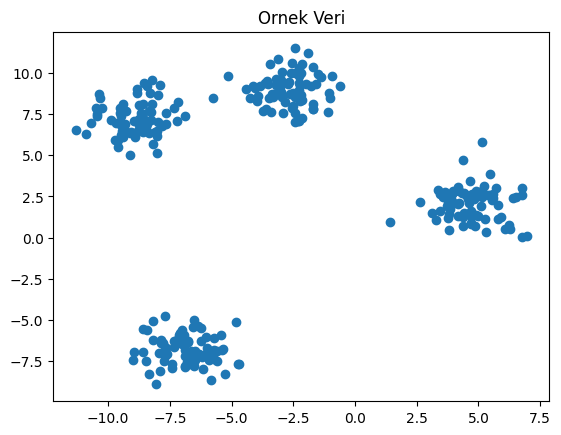

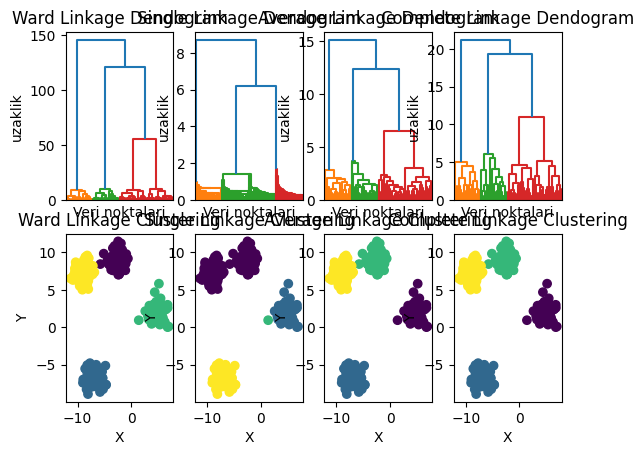

In [16]:
# Hiyerarşik kümeleme algoritması
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1, random_state=42)

plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.title("Ornek Veri")

linkage_methods = ["ward", "single", "average", "complete"]

# bağlantı yöntemleri:
    # ward : küme içi varyansları küçültmeye çalışıyoruz
    # iki kümenin noktlarının mesafesini buluyoz
    # iki küme arasındaki en uzak mesafeyi bularak kümeliyo
    # single : iki kümenin birbirine yakın noktalarını mesafasini alrak kümeleme



plt.figure()
for i, linkage_method in enumerate(linkage_methods, 1):
    
    model = AgglomerativeClustering(n_clusters=4, linkage=linkage_method)
    cluster_labels = model.fit_predict(X)
    
    plt.subplot(2, 4, i)
    plt.title(f"{linkage_method.capitalize()} Linkage Dendogram")
    dendrogram(linkage(X, method = linkage_method), no_labels = True)
    plt.xlabel("Veri noktalari")
    plt.ylabel("uzaklik")
    
    plt.subplot(2, 4, i + 4)
    plt.scatter(X[:, 0], X[:, 1], c = cluster_labels, cmap = "viridis")
    plt.title(f"{linkage_method.capitalize()} Linkage Clustering")
    plt.xlabel("X")
    plt.ylabel("Y")
    

## DBScan Algoritması
#### Bu algoritma, özellikle gürültülü verilere ve farklı şekil ve boyutlardaki kümelere karşı oldukça dayanıklıdır. Çember verileri iyi ayırır
- K-Means gibi sabit bir küme sayısı gerektirmez ve aykırı değerleri (outliers) otomatik olarak tespit edebilir.

Text(0.5, 1.0, 'DBSCAN sonuclari')

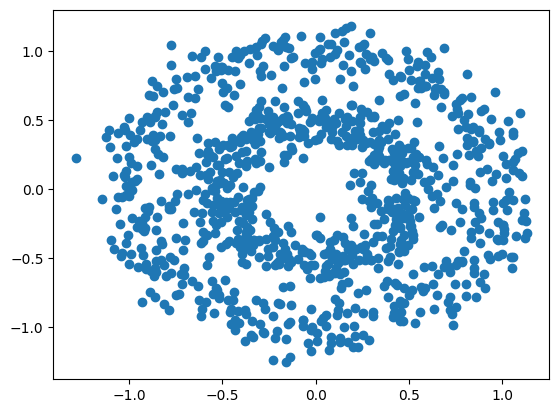

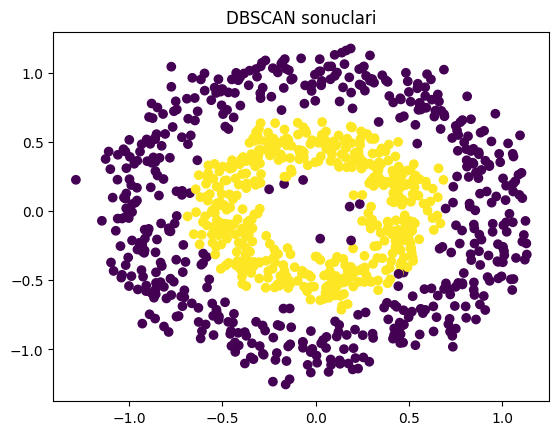

In [17]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=1000, factor = 0.5, noise = 0.11, random_state=42)
plt.figure()
plt.scatter(X[:, 0], X[:, 1])

dbscan = DBSCAN(eps = 0.15, min_samples = 30)
# eps: iki nokta arasındaki kabul edilebilri max mesafe
# samples= komşu kabul edilcek min komşu sayısı

cluster_labels = dbscan.fit_predict(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c = cluster_labels, cmap = "viridis")
plt.title("DBSCAN sonuclari")


## Gözetimsiz Sınıflandırma Algoritmalarının Karşılaştırılması
- K-Means: Bir evde odaları ayırmak için kullanılan basit bir yöntem.
Spektral Kümeleme: Bir evdeki odaları ayırmadan önce evin planını inceleyerek, odaların nasıl daha iyi organize edilebileceğini belirleyen ve ardından K-Means gibi bir yöntemi kullanan daha karmaşık bir yöntem


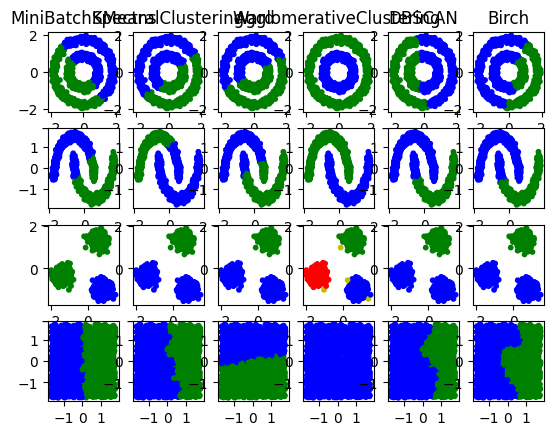

In [18]:
from sklearn import datasets, cluster
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor = 0.5, noise = 0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise = 0.05)
blobs = datasets.make_blobs(n_samples=n_samples)
no_structure = np.random.rand(n_samples, 2), None

clustering_names = ["MiniBatchKMeans", "SpectralClustering", "Ward", 
                    "AgglomerativeClustering", "DBSCAN", "Birch"]

colors = np.array(["b", "g", "r", "c", "m", "y"])
datasets = [noisy_circles, noisy_moons, blobs, no_structure]

plt.figure()
i = 1
for i_dataset, dataset in enumerate(datasets):
    
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    
    two_means = cluster.MiniBatchKMeans(n_clusters=2)
    ward = cluster.AgglomerativeClustering(n_clusters=2, linkage="ward")
    spectral = cluster.SpectralClustering(n_clusters=2)
    dbscan = cluster.DBSCAN(eps = 0.2)
    average_linkage = cluster.AgglomerativeClustering(n_clusters=2, linkage="average")
    birch = cluster.Birch(n_clusters=2)
    
    clustering_algorithms = [two_means, ward, spectral, dbscan, average_linkage, birch]
    
    for name, algo in zip(clustering_names, clustering_algorithms):
        
        algo.fit(X)
        # neden yaptık bazıları label değeri alıyor bazıları almıyor ondan yaptık
        if hasattr(algo, "labels_"):# labels attribute sahipse diyoruz
            y_pred = algo.labels_.astype(int)
        else:
            y_pred = algo.predict(X)
            
        plt.subplot(len(datasets), len(clustering_algorithms), i)
        if i_dataset == 0:
            plt.title(name)
        plt.scatter(X[:, 0], X[:, 1], color = colors[y_pred].tolist(), s = 10)
        i += 1